https://classroom.udacity.com/courses/ud501

Github
https://github.com/aspiringguru/UdacityMachineLearningForTrading


In [529]:
import pandas as pd
import numpy as np


In [530]:
data_folder = './temp/'
def read_symbol(symbol, *args):
    path = '{}{}.csv'.format(data_folder, str(symbol));
    res = pd.read_csv( path,
                       index_col='Date', 
                       parse_dates=True, 
                       usecols=['Date', 'Adj Close'], 
                       na_values=['nan']);
    res = res.rename(columns={'Adj Close': symbol});
    return res


#test
spyDf = read_symbol("SPY")

spyDf.index


DatetimeIndex(['2016-05-09', '2016-05-06', '2016-05-05', '2016-05-04',
               '2016-05-03', '2016-05-02', '2016-04-29', '2016-04-28',
               '2016-04-27', '2016-04-26',
               ...
               '1999-01-06', '1999-01-05', '1999-01-04', '1998-12-31',
               '1998-12-30', '1998-12-29', '1998-12-28', '1998-12-24',
               '1998-12-23', '1998-12-22'],
              dtype='datetime64[ns]', name='Date', length=4372, freq=None)

# Lesson 3. Multi stocks
[link](https://classroom.udacity.com/courses/ud501/lessons/3975568860/concepts/42976001810923)

In [531]:
# Quiz 3.12
def read_and_join_symbol(df, symbol):
    symDf = read_symbol(symbol);
    df = df.join(symDf, how='inner') if symbol == 'SPY' else df.join(symDf);
    return df

# TEST
emptyDf = pd.DataFrame(index=pd.date_range('2010-01-22', '2010-01-26'))
dfGoog = read_symbol('GOOG');
#Check if data existdfGoog[dfGoog.Date == '2010-01-25']
dfSpy = read_symbol('SPY');
#Join
df = emptyDf.join(dfSpy, how='inner')
df = df.join(dfGoog, how="inner")
df



,SPY,GOOG
2010-01-22,95.201720,274.730736
2010-01-25,95.689887,269.730740
2010-01-26,95.288892,270.939526


In [532]:
# Quiz 3.12 
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df = read_and_join_symbol(df, symbol)
    return df

dates = pd.date_range('2010-01-22', '2010-01-26')
symbols = ['GOOG', 'IBM', 'GLD']
df = get_data(symbols, dates)
df

,SPY,GOOG,IBM,GLD
2010-01-22,95.201720,274.730736,107.359151,107.169998
2010-01-25,95.689887,269.730740,107.889534,107.480003
2010-01-26,95.288892,270.939526,107.573014,107.559998


In [533]:
def get_symbols(symbols = ['GOOG', 'IBM', 'GLD'], date_range = ['1998-12-22', '2016-05-09']):
    return get_data(symbols, pd.date_range('1998-12-22', '2016-05-09'))

# Slice the data
df = get_symbols()
df[['GOOG', 'GLD']]

df = df1.loc['2015-01-01':'2015-10-01', ['GOOG', 'GLD']];
df[1:10:2] #Every second

,GOOG,GLD
2015-01-05,513.872306,115.800003
2015-01-07,501.102268,116.430000
2015-01-09,496.172244,117.260002
2015-01-13,496.182251,118.160004
2015-01-15,501.792271,120.940002


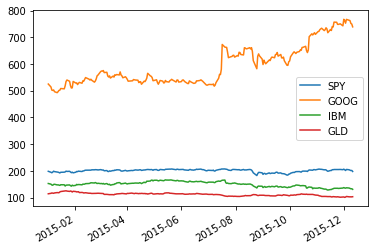

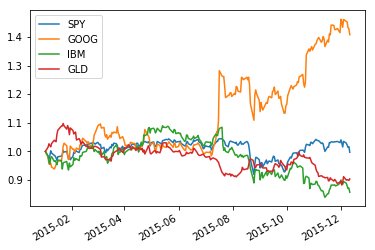

In [534]:
# 3.16 Normalize
df = get_symbols()
df = df.loc['2015-01-01':'2015-12-12']
df.plot();
df = df/df.iloc[0]
df.plot();


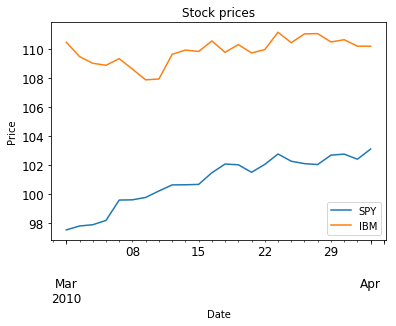

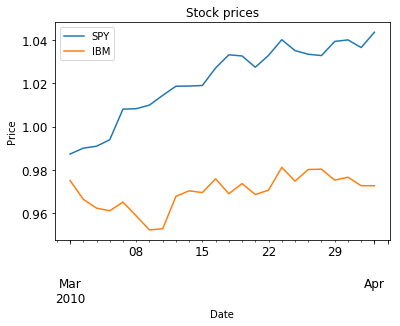

In [535]:
# 3.18
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df = df.loc[start_index : end_index, columns];
    plot_data(df)
    
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def normalize_df(df):
    return df/df.iloc[0]

# Define a date range
dates = pd.date_range('2010-01-01', '2010-12-31')
# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
# Get stock data
df = get_data(symbols, dates)
# Slice and plot
plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
plot_selected(normalize_df(df), ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

# 4 Numpy
> wrapper to numerical libs,similar to MatLab, [:]
df.values => np.array

In [536]:
import numpy as np

In [537]:
# Target last ROW and 2 last cols
df.values[-1, -2:]

array([127.948102, 138.720001])

In [538]:
print(np.array([(3, 2, 1), (1, 2, 3)]))

print(np.empty((3, 2))) # Memory values

print(np.ones((5, 4), dtype=np.int));
print(np.random.randint(0, 10, size=(3, 3))) #range


[[3 2 1]
 [1 2 3]]
[[1.5e-323 9.9e-324]
 [4.9e-324 4.9e-324]
 [9.9e-324 1.5e-323]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0 7 2]
 [6 0 0]
 [4 3 2]]


In [539]:
arr = np.random.rand(5, 5)
arr.size, arr.dtype, arr.min(), arr.mean(), arr.std()

#Axis=0 => ROWS 
#Axis=1 => COLS
arr = np.random.randint(0, 5, size = (3, 4))
print(arr)

print('sum rows:', arr.sum(axis=0))
print('sum cols:', arr.sum(axis=1))
print('sum:', arr.sum())
print('mean:', arr.mean(axis=0))

[[0 2 4 4]
 [3 3 2 2]
 [1 1 2 1]]
sum rows: [4 6 8 7]
sum cols: [10 10  5]
sum: 25
mean: [1.33333333 2.         2.66666667 2.33333333]


In [540]:
# Quiz 4.12

def get_max_index(a):
    """Return the index of the maximum value in given 1D array."""
    return a.argmax()

a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32)  # 32-bit integer array
print("Array:", a)


# Find the maximum and its index in array
print("Maximum value:", a.max())
print("Index of max.:", get_max_index(a))

Array: [ 9  6  2  3 12 14  7 10]
Maximum value: 14
Index of max.: 5


In [541]:
import time

# NumPY is 300X faster for mean calc

In [542]:
arr =np.random.randint(0, 10, size=(3, 3))
print(arr)

arr[1, :] = 7;
print('Set row to const\n', arr)

arr[:, 1] = [7, 6, 5];
print('Set col to [const]\n', arr)


[[5 7 1]
 [9 0 0]
 [5 0 3]]
Set row to const
 [[5 7 1]
 [7 7 7]
 [5 0 3]]
Set col to [const]
 [[5 7 1]
 [7 6 7]
 [5 5 3]]


In [543]:
#4.18 Filter MASKING

arr[arr > arr.mean()] 

array([7, 7, 6, 7])

# Lesson 5 Statistic of time series
> global stats (std, mean..), Rolling - bollinger-band, Returns - day, cumulative 

General stats:
- median -> sort and select middle
- mean -> add all/count
- std -> deviation from mean

In [544]:
# 5.3 Global stats
df = get_symbols()['2015-01-01':]
df.describe()

,SPY,GOOG,IBM,GLD
count,340.000000,340.000000,340.000000,340.000000
mean,199.381226,632.959206,145.135840,112.203588
std,6.343697,87.782533,11.747610,5.987934
min,180.070923,492.552239,115.724090,100.500000
25%,195.589471,539.760627,135.734703,107.124998
50%,201.849717,635.220002,146.254609,113.060001
75%,204.152306,717.442505,153.651295,116.602499
max,207.962554,776.599976,166.230023,125.230003


### 5.5 Rolling stats
Rolling mean - line that lags main price line.
Use window in days to add rect

#### SimpleMovingAverage 
> tech indicator, is  a rolling_mean 
- buy/sell signal when price deviated enough from mean. Use rolling_std()

#### Bolinger bands
- add 2 lines around rolling mean +/- 2std


### Plot SMA1

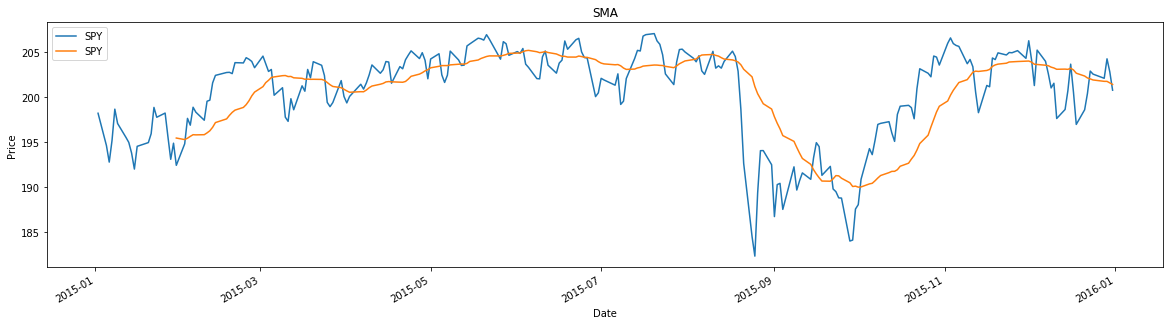

In [545]:
# Plot SMA
df = get_symbols(['SPY'])['2015-01-01':'2016-01-01'];
ax = df.plot(title='SMA', figsize=(20, 5));
ax.set_xlabel('Date');
ax.set_ylabel('Price');

dfRMean = df.rolling(window=20).mean();
#roll = df.rolling(window=20)

dfRMean.plot(ax=ax,  title='SMA'); # Plot on the same chart

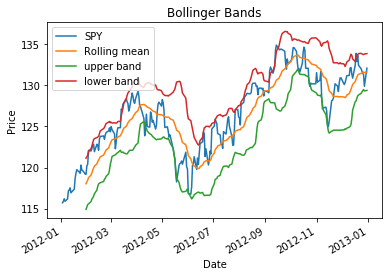

In [546]:
# 5.9 Quiz CANNOT PASS, deperecation warnings
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    return ax


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    roll = values.rolling(window=window);
    return roll.mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    roll = values.rolling(window=window);
    return roll.std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band, lower_band = (rm-2*rstd, rm+2*rstd);
    return upper_band, lower_band


# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

### 5.10 Daily Returns

- interesting to check across diff assets

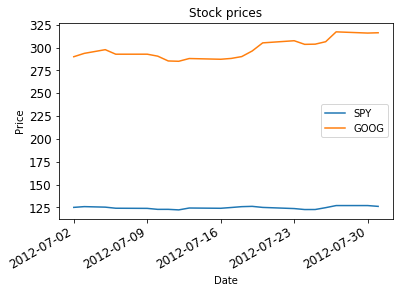

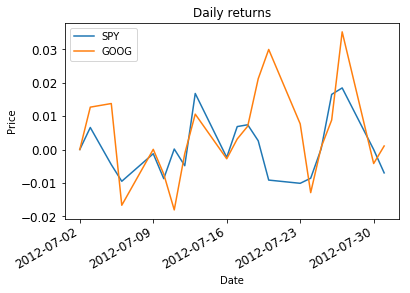

In [547]:
#5.11 Quiz
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    #daily_returns = df.copy()  
    #from1_to_end = daily_returns[1:]
    #from_minus1_to_start = daily_returns[:-1].values; #.values - to avoid shifting 
    #daily_returns[1:] = (from1_to_end/from_minus1_to_start) - 1
    daily_returns = (df/df.shift(1)) -1;
    
    daily_returns.iloc[0, :] = 0;
    return daily_returns


dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','GOOG']
df = get_data(symbols, dates)


plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns")

,SPY,GOOG
count,21.000000,21.000000
mean,124.630751,297.727785
std,1.431420,10.475888
min,122.320637,284.955526
25%,123.768220,289.945546
50%,124.757708,293.621878
75%,125.857134,305.105426
max,127.057342,317.163394


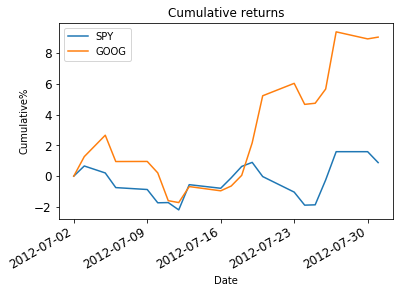

In [549]:
#5.16 Cumulative returns
def compute_cumulative_returns(df):
    """Compute and return the daily return values."""
    return 100*(df/df.values[0] - 1) #DataFrame - const, where const values[x]

cumulative_returns = compute_cumulative_returns(df);
ax = plot_data(cumulative_returns, title="Cumulative returns")
ax.set_ylabel('Cumulative%');


df.describe()

# 6. Incomplete data

- same stock can trade on different exchanges with diff price
- same stocks start/stop trading
- data is incomplete

Don't interpolate:
 - fill forwards
 - fill backwards